In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score

In [2]:
data = yf.download('^HSI','2019-01-01','2022-01-01')
data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)
data_val=data[-100:]
data=data[:-100]


[*********************100%***********************]  1 of 1 completed


In [3]:
svm = make_pipeline(MinMaxScaler(feature_range=(-1,1)),SVR())

In [4]:
X=data.drop(['Volume','Prediction'],1).values
Y=data['Prediction'].values

/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_75489/2291348358.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=data.drop(['Volume','Prediction'],1).values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)
# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [6]:
svm.fit(
    X_train,
    y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler(feature_range=(-1, 1))),
                ('svr', SVR())])

In [7]:
y_pred=svm.predict(X_test)

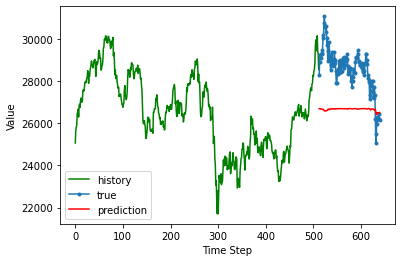

In [8]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

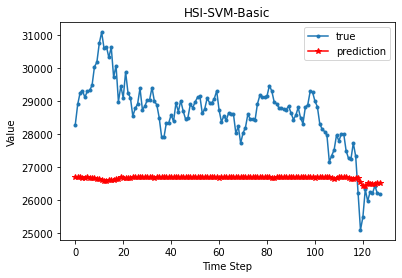

In [9]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('HSI-SVM-Basic')
plt.legend()

In [10]:
mean_squared_error(y_test,y_pred,squared=False)

2159.2408821445633

In [11]:
mean_absolute_percentage_error(y_test,y_pred)

0.06859146874401752

In [12]:
r2_score(y_test,y_pred)

-3.4191409726335307